In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | bandar-e torkaman
City not found. Skipping...
Processing Record 3 of Set 1 | tamisu
City not found. Skipping...
Processing Record 4 of Set 1 | adrar
Processing Record 5 of Set 1 | tezu
Processing Record 6 of Set 1 | berlevag
Processing Record 7 of Set 1 | kisangani
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | kleive
Processing Record 19 of Set 1 | boende
Processing Record 20 of Set 1 | garden acres
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | nizhneya

Processing Record 35 of Set 4 | tazovskiy
Processing Record 36 of Set 4 | manta
Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | burns lake
Processing Record 39 of Set 4 | hue
Processing Record 40 of Set 4 | victoria
Processing Record 41 of Set 4 | chinsali
Processing Record 42 of Set 4 | sao felix do xingu
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | katobu
Processing Record 47 of Set 4 | bomet
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 50 of Set 4 | bontang
Processing Record 1 of Set 5 | marawi
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | labuhan
Processing Record 5 of Set 5 | faya
Processing Record 6 of Set 5 | fecamp
Processing Record 7 of Set 5 | carnarvon
Processing Record 8

Processing Record 22 of Set 8 | sao filipe
Processing Record 23 of Set 8 | sidney
Processing Record 24 of Set 8 | hasaki
Processing Record 25 of Set 8 | virtsu
Processing Record 26 of Set 8 | rize
Processing Record 27 of Set 8 | hofn
Processing Record 28 of Set 8 | halifax
Processing Record 29 of Set 8 | gusau
Processing Record 30 of Set 8 | ballina
Processing Record 31 of Set 8 | bengkulu
Processing Record 32 of Set 8 | walvis bay
Processing Record 33 of Set 8 | hutchinson
Processing Record 34 of Set 8 | san cristobal
Processing Record 35 of Set 8 | naze
Processing Record 36 of Set 8 | isangel
Processing Record 37 of Set 8 | deep river
Processing Record 38 of Set 8 | half moon bay
Processing Record 39 of Set 8 | bredasdorp
Processing Record 40 of Set 8 | oytal
Processing Record 41 of Set 8 | alekseyevka
Processing Record 42 of Set 8 | woodstock
Processing Record 43 of Set 8 | ullapool
Processing Record 44 of Set 8 | aksu
Processing Record 45 of Set 8 | chililabombwe
Processing Record 

Processing Record 10 of Set 12 | bahia de caraquez
Processing Record 11 of Set 12 | junagarh
Processing Record 12 of Set 12 | millinocket
Processing Record 13 of Set 12 | muli
Processing Record 14 of Set 12 | dongsheng
Processing Record 15 of Set 12 | emerald
Processing Record 16 of Set 12 | thabazimbi
Processing Record 17 of Set 12 | wahiawa
Processing Record 18 of Set 12 | haines junction
Processing Record 19 of Set 12 | sataua
City not found. Skipping...
Processing Record 20 of Set 12 | moosburg
Processing Record 21 of Set 12 | noumea
Processing Record 22 of Set 12 | ukiah
Processing Record 23 of Set 12 | kismayo
Processing Record 24 of Set 12 | bartica
Processing Record 25 of Set 12 | morinville
Processing Record 26 of Set 12 | igarka
Processing Record 27 of Set 12 | satao
Processing Record 28 of Set 12 | lodwar
Processing Record 29 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 30 of Set 12 | alvand
Processing Record 31 of Set 12 | taoudenni
Processing Record

In [8]:
# Convert the array of dictionaries to a Pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["column1", "column8", "column9", "column2", "column3", "column4", "column5", "column6", "column7"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-04-03 22:20:02,-33.9258,18.4232,62.28,87,20,3.44
1,Adrar,MR,2022-04-03 22:22:41,20.5022,-10.0711,78.26,11,0,12.17
2,Tezu,IN,2022-04-03 22:22:41,27.9167,96.1667,66.60,96,100,5.06
3,Berlevag,NO,2022-04-03 22:19:23,70.8578,29.0864,26.60,59,40,12.66
4,Kisangani,CD,2022-04-03 22:22:41,0.5167,25.2000,70.41,96,39,2.42
5,Hilo,US,2022-04-03 22:22:18,19.7297,-155.0900,75.25,91,100,8.01
6,Bluff,NZ,2022-04-03 22:22:42,-46.6000,168.3333,56.44,74,99,10.25
7,Ancud,CL,2022-04-03 22:22:42,-41.8697,-73.8203,50.23,76,89,7.54
8,Bethel,US,2022-04-03 22:22:42,41.3712,-73.4140,42.89,89,100,3.00
9,Souillac,MU,2022-04-03 22:22:43,-20.5167,57.5167,79.18,83,75,11.50


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

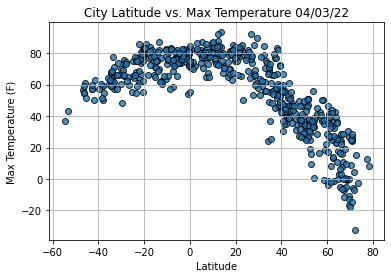

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot. 
plt.show()

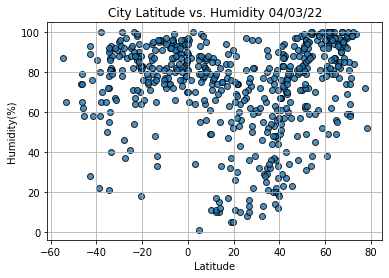

In [14]:
# Build the scatter plots for latitude vs humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

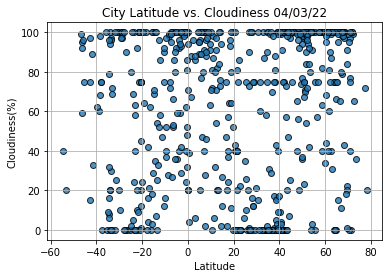

In [15]:
# Build the scatter plots for latitude vs cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

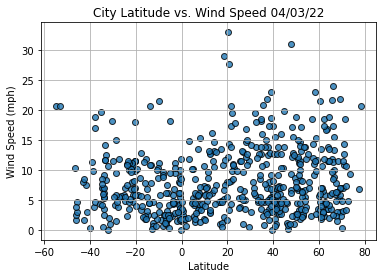

In [16]:
# Build the scatter plots for latitude vs wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()